# Homework 1: $k$-Nearest Neighbors ($k$-NN)

For this assignment, answer directly on this Jupyter notebook. Once you're done, please submit the assignment as "Name_hw1_coding.pdf".

*Don't forget that commenting your code is very important!*




###  $k$-NN Implementation

- Implement the $k$-NN algorithm by hand (ie. Don't use the sklearn implementation).
- Evaluate and plot model performance for different values of $k$.

For this question, we will be using the classic Iris dataset, available in sklearn.

### 1. Import packages

###### Importing packages and knowing what packages you need for a project is crucial. We will not be reminding you which packages you need for each question and for the assignment in general. Please import the packages at your own discretion. Although it is common practice to import all packages at once at the beginning, don't hesitate to revisit the next cell, and import more packages as you may need. 

In [1]:
# Implement kNN by hand. It might be useful to store all distances in one array/list

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import operator

from sklearn.datasets import load_iris
from sklearn.utils import shuffle

### 2. Load the Iris dataset

In [2]:
# loading dataset
iris = load_iris()
iris_df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])

# Preview dataset
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


###### In order to evaluate the performance of our kNN implementation, we first split the dataset into training and test sets. A 70/30 split or something similar should suffice. Remember class balance within both train/test sets is important.

In [3]:
### YOUR CODE HERE - Shuffle dataset, then split for balanced classes
def reset_data():
    tmp = shuffle(iris_df)
    row = len(tmp)
    trainingSet_temp = tmp.head((int)(row*0.7))
    testSet_temp = tmp.tail(row-(int)(row*0.7))
    trainingSet = trainingSet_temp.values.tolist()
    testSet = testSet_temp.values.tolist()
    return (trainingSet,testSet)


### 3. Defining a distance metric

###### To define similarity between two given points, we must define a distance metric. Write a method that takes  two points as input and returns the distance between the points. Look at the format of each point in the sample case below.

In [4]:
### YOUR CODE HERE - Write method that returns Euclidean distance between two points, last element in point array is class 
# from scipy.spatial import distance
def getDistance(p1, p2):
    """ 
    p1:  a numpy array, last element of the array is the class of the point
    p2:  a numpy array, last element of the array is the class of the point
    Calculates the Euclidean distance between two points. Returns dist float
    """
    # return distance.euclidean(p1[:-1].astype(np.float32),p2[:-1].astype(np.float32))#using the scipy libruary to get fast.
    sum = 0.0
    for i in range(len(p1)-1):
        # print(p1[i])
        # print(p2[i])
        sum += (p1[i]-p2[i])**2
    return sum**0.5

######  Let's test our newly written method on the following samples.

In [5]:
data1 = [2, 2, 2, 'a']
data2 = [4, 4, 4, 'b']
for i in range(1000000):distance = getDistance(data1, data2)

print(distance)

3.4641016151377544


### 4. Finding k nearest neighbours

###### Now that we've defined a distance metric, we can use it collect the k most similar instances for a new test instance. Write a method calculating the distance between a test point and all training instances, selecting a subset with the smallest distance values. It might be useful to store all the distances in a list/array, since Python has a built-in sorting function.

In [6]:
### YOUR CODE HERE - Write method calculating the distance for all instances, selecting a subset with the smallest distance values.
import heapq # to make this program fast
def getNeighbours(trainingSet, sample, k):
    """
    trainingSet: a list of points, where each point is a numpy array and the last element of the array is the class of the point
    sample: a numpy array, last element of the array is the class of the point
    k: positive integer 
    
    Calculates k nearest neighbours using a distance metric. 
    
    Returns neighbours list
    """
    x = len(trainingSet)
    temp = np.zeros(x)
    for i in range(x):
        a = getDistance(trainingSet[i],sample)
        temp[i] = a
    # max_index = np.where(heapq.nlargest(k, temp))[0]
    # list0=[]
    # for i in max_index:
    #     print(i)
    #     list0.append(trainingSet[i])
    # return list0
    idx = (temp).argsort()[:k]
    list0=[]
    for i in idx:
        list0.append(trainingSet[i])
    return list0


######  Let's test our newly written method on the following samples.

In [7]:
trainSet = [[2, 2, 2, 'a'], [4, 4, 4, 'b']]
testInstance = [5, 5, 5]

neighbors = getNeighbours(trainSet, testInstance, 1)
print(neighbors)

[[4, 4, 4, 'b']]


###### Now to build a prediction model, write a method that returns a prediction given k nearest neighbours from the previous method. (Hint: one way you can do this is to build a dictionary, and sort the key-value pairs to determine which class occurs the most often!)

In [8]:
### YOUR CODE HERE - Write method that takes in k nearest neighbours as input, and votes based on the majority class.

def predict(neighbours):
    """ 
    neighbours: a list of points, where each point is a numpy array and the last element of the array is the class of the point
    
    Returns predicted class response in string format based off majority vote from k neighbours set 
    """
    temp_list=[]
    for i in neighbours:
        temp_list.append(i[-1])
    return max(set(temp_list),key=temp_list.count)


###### Test your method on the following samples

In [9]:
neighbors = [[1,1,1,'a'], [2,2,2,'a'], [3,3,3,'b']]
response = predict(neighbors)
print(response)

a


### 5. Measuring Model Performance

######  We're basically ready to test the performance of our very own $k$-NN implementation! One popular classification metric is accuracy, use the following method to check how well our $k$-NN algorithm performs on the test set we left aside.

In [10]:
def getAccuracy(testSet, predictions):
    correct = 0
    for x in range(len(testSet)):
        if (testSet[x][-1] == predictions[x]):
            correct += 1
    return (correct/float(len(testSet))) * 100.0

##### Test the method on the following samples.

In [11]:
testSet = [[1,1,1,'a'], [2,2,2,'a'], [3,3,3,'b']]
predictions = ['a', 'a', 'a']
accuracy = getAccuracy(testSet, predictions)
print(accuracy)

66.66666666666666


######  Make predictions on the test set for different values of $k$. Compare the accuracy for different values and plot test performance, explaining why you think performance increases or decreases for different values of k (WRITE ANSWER IN BOX BELOW PLOT). Loop from $k=1$ to $k=49$ (inclusively), only considering cases where k is odd.

In [12]:
### YOUR CODE HERE - Create a dictionary to store accuracies for different values of $k$.
N = 2000
avg = np.zeros(max(N,105))
dict_k={}
bias = {}
count = []
var = np.zeros(max(N,105))
# for a in range(N):
#     (trainingSet,testSet)=reset_data()
#     x = len(testSet)
#     pred_temp = []
#     for k in range(1,50,2):
#         predictions = []
#         for i in testSet:
#             predictions.append(predict(getNeighbours(trainingSet,i,k=k)))
#         y = getAccuracy(testSet,predictions)
#         pred_temp.append(y)
#         temp[k]+=y
#     count.append(pred_temp)
for k in range(1,50,2):
    pred_temp = []
    for a in range(N):
        predictions = []
        (trainingSet,testSet)=reset_data()
        for i in testSet:
            predictions.append(predict(getNeighbours(trainingSet,i,k=k)))
        y = getAccuracy(testSet,predictions)
        pred_temp.append(y)
        avg[k] += y
    avg[k] /= N
    for b in range(N):
        var[k] += (avg[k]-pred_temp[b])**2/(N-1)
    dict_k[k] = avg[k]
    bias[k] = 100 - dict_k[k]

# for k in range(1,50,2):
#     print((k,var[k]))



##### Plot a bar chart, having the different values of $k$ on the x-axis and the test accuracy (in %) on the y-axis. Add a plot title, and choose a suitable format for readability.

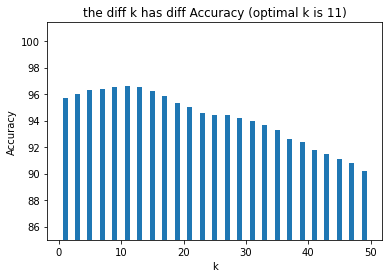

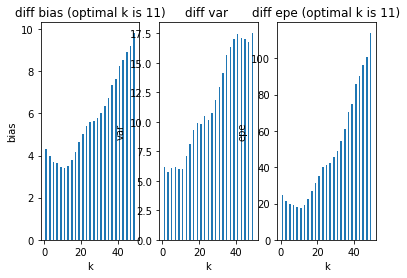

In [13]:
### YOUR CODE HERE - Create a bar plot
x_k = []
y_acc = []
y_bias = []
y_var = []
y_epe = []
for i in dict_k: 
    x_k.append(i)
    y_acc.append(dict_k[i])
    y_bias.append(bias[i])
    y_var.append(var[i])
    y_epe.append(bias[i]**2+var[i])
plt.figure()
plt.bar(x_k,y_acc)
plt.xlabel("k")
plt.ylabel("Accuracy")
plt.ylim(bottom=85)
plt.title("the diff k has diff Accuracy (optimal k is 11)")
plt.show()

plt.figure()
plt.subplot(1,3,1)
plt.bar(x_k,y_bias)
plt.xlabel("k")
plt.ylabel("bias")
plt.title("diff bias (optimal k is 11)")

plt.subplot(1,3,2)
plt.bar(x_k,y_var)
plt.xlabel("k")
plt.ylabel("var")
plt.title("diff var ")

plt.subplot(1,3,3)
plt.bar(x_k,y_epe)
plt.xlabel("k")
plt.ylabel("epe")
plt.title("diff epe (optimal k is 11)")
plt.show()



### <span style="background-color: #F9F2EB">we can never get both optimal bias and variance.With more complex model (which means the smaller k than "11",overfitting), the bias is smaller and the variance is larger. Instead, with less complex model (which means the larger k than "11",underfitting), the bias is larger and the variance is smaller.  </span>
*(Hint: think of the bias-variance trade-off/ AND underfitting/overfitting)*